<a href="https://colab.research.google.com/github/SaishWarule1116/LangGraph-Experiments/blob/main/2_PromptChaining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 17.1 MB/s eta 0:00:00


In [ ]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

from google.colab import userdata
import google.generativeai as genai # import genAI
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY') #featch API_Key from colab Secrets
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
# Initialize the Gemini API
gemini_model = genai.GenerativeModel('gemini-2.5-flash-preview-04-17')

In [ ]:
response = gemini_model.generate_content('Hey')
print(response.text)

Hey there! How can I help you today?


In [ ]:
class BlogState(TypedDict):
  topic: str
  outline: str
  content: str


In [ ]:
def create_outline(state: BlogState) -> BlogState:

    # Featch Title
    title=state['topic']

    # Call LLm Gen Outline
    prompt = f"Genrate a detailed outline for a blog on topic -{title} "
    outline =gemini_model.generate_content(prompt)

    # update State
    state['outline'] = outline.text
    return state

In [ ]:
def create_content(state: BlogState) -> BlogState:
  title = state['topic']
  outline = state['outline']

  prompt = f"Write a detailed Blog blog on Title{title} using the following outline \n {outline}"
  content = gemini_model.generate_content(prompt)

  state['content'] = content.text
  return state

In [ ]:
graph = StateGraph(BlogState)

graph.add_node('create_outline',create_outline)
graph.add_node('create_content',create_content)
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_content')
graph.add_edge('create_content',END)

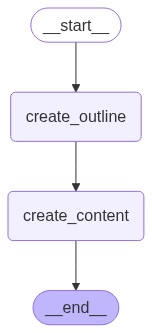

In [ ]:
workflow = graph.compile()
workflow

In [ ]:
initial_state={'topic': "Raise Of Data Sci In Upcoming Decade"}
final_state = workflow.invoke(initial_state)
print(final_state)

ERROR:tornado.access:503 POST /v1beta/models/gemini-2.5-flash-preview-04-17:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 7028.72ms


{'topic': 'Raise Of Data Sci In Upcoming Decade', 'outline': 'Okay, here is a detailed outline for a blog post on the "Rise of Data Science in the Upcoming Decade."\n\n**Blog Title Options:**\n\n*   The Next Decade of Data Science: What to Expect\n*   Why Data Science Will Dominate the Next 10 Years\n*   The Accelerating Rise of Data Science: A Look Ahead\n*   Data Science 2030: Trends Shaping the Future\n*   Beyond Buzzword: The Real Impact of Data Science in the Coming Decade\n\n**Target Audience:** Professionals (especially in tech, business, and data roles), students considering data science careers, business leaders, investors, and anyone interested in technological trends.\n\n**Tone:** Informative, forward-looking, slightly enthusiastic about potential, but also realistic about challenges.\n\n**Estimated Word Count:** ~1000-1500 words (outline is detailed enough to support this length)\n\n---\n\n**Blog Outline: The Rise of Data Science in the Upcoming Decade**\n\n**I. Introductio